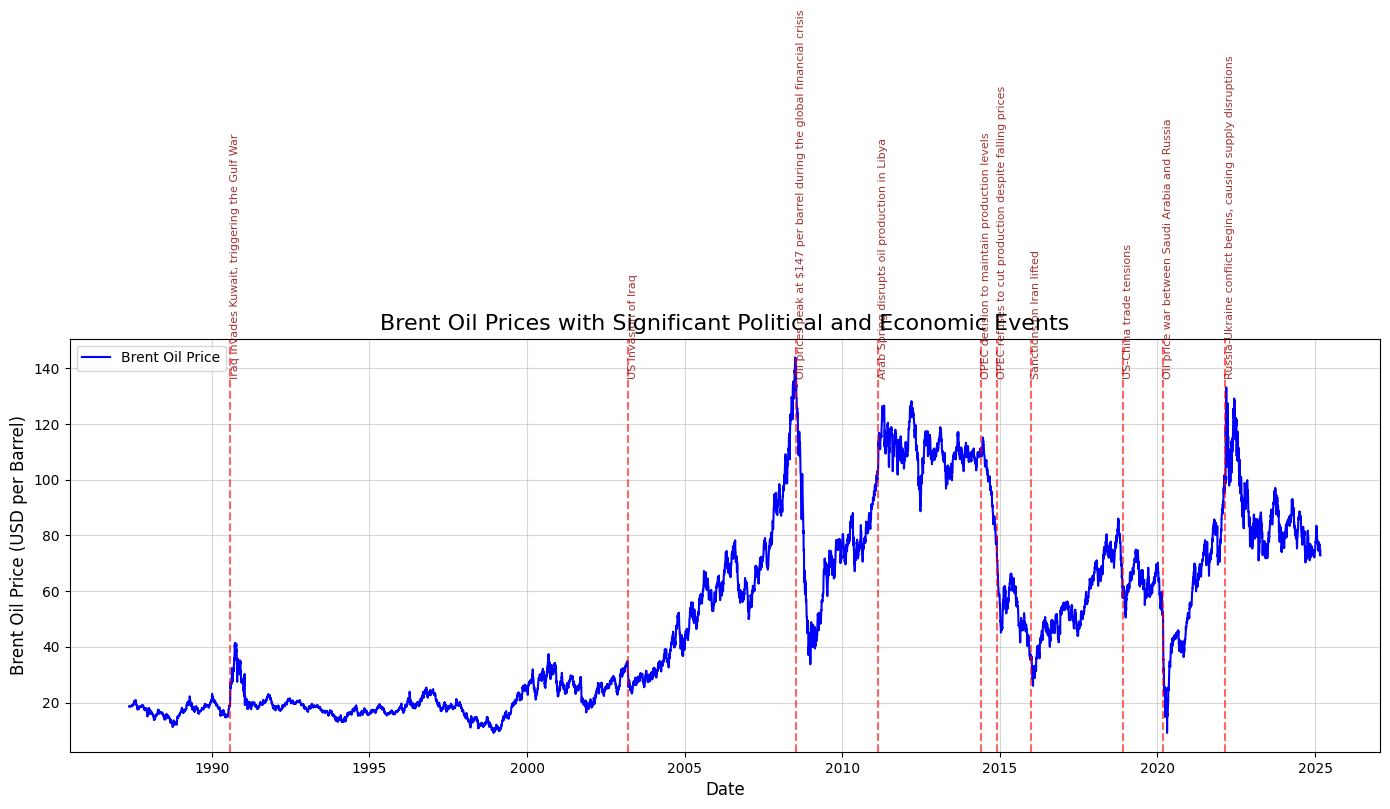

Merged data with events saved successfully!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Load Brent Oil Price Data
brent_data = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/notebooks/Cleaned_BrentOilPrices.csv')
brent_data['Date'] = pd.to_datetime(brent_data['Date'])  
brent_data.rename(columns={'Price': 'Brent_Oil_Price'}, inplace=True)
brent_data = brent_data[['Date', 'Brent_Oil_Price']]

# Step 2: Define Significant Events
events = [
    {"date": "2014-06-01", "event": "OPEC decision to maintain production levels"},
    {"date": "2016-01-01", "event": "Sanctions on Iran lifted"},
    {"date": "2018-12-01", "event": "US-China trade tensions"},
    {"date": "1990-08-02", "event": "Iraq invades Kuwait, triggering the Gulf War"},
    {"date": "2003-03-20", "event": "US invasion of Iraq"},
    {"date": "2008-07-11", "event": "Oil prices peak at $147 per barrel during the global financial crisis"},
    {"date": "2011-02-15", "event": "Arab Spring disrupts oil production in Libya"},
    {"date": "2014-11-27", "event": "OPEC refuses to cut production despite falling prices"},
    {"date": "2020-03-09", "event": "Oil price war between Saudi Arabia and Russia"},
    {"date": "2022-02-24", "event": "Russia-Ukraine conflict begins, causing supply disruptions"}
]

# Convert events to a DataFrame
events_df = pd.DataFrame(events)
events_df['date'] = pd.to_datetime(events_df['date'])

# Step 3: Merge Events with Brent Oil Prices
merged_data = pd.merge(brent_data, events_df, left_on='Date', right_on='date', how='outer')
merged_data.sort_values(by='Date', inplace=True)

# Step 4: Plot Brent Oil Prices with Events
plt.figure(figsize=(14, 8))
plt.plot(brent_data['Date'], brent_data['Brent_Oil_Price'], label='Brent Oil Price', color='blue')

# Annotate Events on the Plot
for _, row in events_df.iterrows():
    plt.axvline(x=row['date'], color='red', linestyle='--', alpha=0.6)
    plt.text(row['date'], brent_data['Brent_Oil_Price'].max() * 0.95,
             row['event'], rotation=90, fontsize=8, color='darkred', alpha=0.8)

# Add Labels, Title, and Legend
plt.title("Brent Oil Prices with Significant Political and Economic Events", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Brent Oil Price (USD per Barrel)", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Step 5: Save the Merged Data
merged_data.to_csv('Brent_Oil_Prices_with_Events.csv', index=False)
print("Merged data with events saved successfully!")
